# [ICTCOG AI Academy] 7기 고급시각저녁반
# 다양한 영상 처리 라이브러리 (4) - 기타
- 기계학습.pdf 참고 

### 기계학습
- 목적 : 데이터로부터 **Specific 문제 해결**을 위한 최적의 모델을 만들기
  - 약인공지능: 하나의 알고리즘은 동시에 여러가지 못함
  - 하이퍼 파라미터 튜닝
  - 문제에 따라 알고리즘, 데이터양 상이

* 지도학습
- 비지도학습
- 강화학습

특성 기반으로 모델 생성

#####차원의 저주
- overfitting: 모델의 복잡성에 비해 데이터가 부족 

- 해결책
  - 데이터 양
    - 중심극한정리 : 데이터 양이 어느정도 많으면 정규분포 근사
  - 중요한 특징 선택
    - 차원축소 PCA
    - 특징 선택 : 특정 특징 선택
    - 특징 추출 : convolution


In [1]:
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV, cross_val_score #중요\

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data=load_iris()

### Laerning Curve
- epoch 수/학습 데이터 양에 따른 성능 변화 
- 데이터가 충분하면 수렴함
- 알고리즘 별로 상이

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_size, train_score, test_score =learning_curve(KNeighborsClassifier(), data.data, data.target )

In [ ]:
learning_curve(KNeighborsClassifier(), data.data, data.target )  #시각화 하여 이해를 도움

(array([ 12,  39,  66,  93, 120]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.98924731, 0.96774194, 0.98924731, 0.97849462, 0.97849462],
        [0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667]]),
 array([[0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
        [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
        [0.96666667, 0.86666667, 0.86666667, 0.93333333, 0.9       ],
        [0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]]))

In [ ]:
!pip install sklearn-evaluation

In [ ]:
from sklearn_evaluation import plot

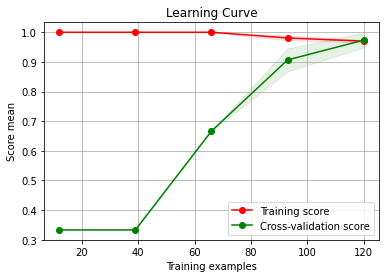

In [ ]:
plot.learning_curve(train_score, test_score, train_size)

[이미지 분류 TF 공신문서 참고](https://www.tensorflow.org/tutorials/keras/classification)

1. 문제 정의 / 데이터 수집
  1. 기계학습 사용할지 여부에 대한 고려
  2. 딥러닝
2. 데이터 수집 / 문제 정의

In [ ]:
import tensorflow as tf

In [ ]:
dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

#### 데이터셋 수집
- fashion_mnist 연습용 데이터셋 사용
  - 10개 범주와 70,000개의 28x28 흑백 이미지
  - mnist 손글씨 숫자 데이터가 너무 단순해서 좀 더 복잡한 연습용 데이터
- 데이터셋 구성 확인 필요
  - 머신러닝 목적 :
  - 기계학습 2차원의 정형화된 데이터

#### 문제정의
- 이미지로 표현된 10가지의 의류 상품 분류

In [ ]:
tf.keras.datasets.fashion_mnist.load_data() #len technique -> unpacking

4423680/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
len(tf.keras.datasets.fashion_mnist.load_data()) #2개

2

In [ ]:
x,y = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
len(x)  # 또 2개

2

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

#### EDA ( Exploratory Data Analysis)
- 데이터 종류에 따라 방식이 다름


In [ ]:
len(X_train) + len(X_test) #7만개

70000

In [ ]:
X_train[0,:,:]  #0번째 이미지
X_train[0,...]
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
X_train[0].shape #28x28 흑백 이미지 (2차원)

(28, 28)

In [ ]:
X_train[0].size

784

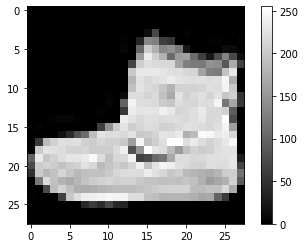

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

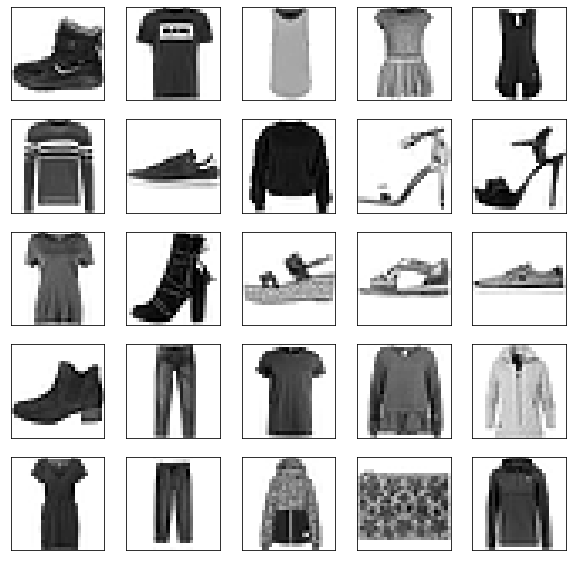

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25): #25개 시각화 
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)

- 낙관적 편향 : 학습한 데이터로 평가
- 새로운 데이터로 평가
- 데이터 양에 따라 train, test set을 분리함
  - 데이터가 적은 경우 : **cross validation**
  - 데이터가 충분한 경우 : **holdout**
    - data leackage, data shift 되지 않았다고 가정
      - 가정은 특정 상황에서만 성립


In [ ]:
import mglearn

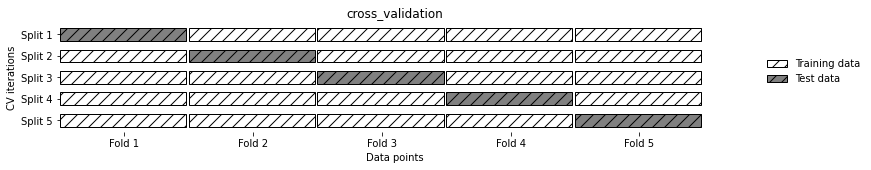

In [ ]:
mglearn.plot_cross_validation.plot_cross_validation()

flatten , ravel, reshape 으로 1차원화
- copy, view 여부의 차이




In [ ]:
X_train[0].flatten()  #0번째 데이터 1차원화

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
X_train.reshape(60000,-1)  #-1 자동으로 1차원화 
X_train.reshape(60000,28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
X_train =X_train.reshape(60000,-1)  
X_test = X_test.reshape(10000,-1)  

In [ ]:
len(X_test)

10000

TensorFlow에서 가져온 데이터를 Scikit-learn에서도 쓸 수 있음

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #classification

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

- 딥러닝은 vectorization 때문에  예측 속도가 빠름

In [ ]:
knn.score(X_test,y_test) #학습에 비해 예측속도가 느림

0.8554

In [ ]:
knn.predict([X_test[0]]) #학습한 데이터의 차원 맞춰야함

array([9], dtype=uint8)

#### openCV 장점
- GPU 사용 가능 
- 포팅 용이

In [ ]:
knn.predict([X_test[3]])

array([1], dtype=uint8)

In [ ]:
from sklearn.model_selection import cross_val_score ,cross_val_predict, cross_validate

overfitting: 데이터가 적어서 편차가 큼 
### cross validation 3총사
##### cross_val_score
- 각fold별 평가값
  - 정확도 accuracy

In [ ]:
#5-folds corss validation
cross_val_score(KNeighborsClassifier(), X_train[:25], y_train[:25], cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.6, 0.2, 0.4, 0.2, 0.2])

##### cross_val_predict
- 각 입력의 예측값

In [ ]:
cross_val_predict(KNeighborsClassifier(), X_train[:25], y_train[:25], cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([9, 0, 1, 4, 0, 0, 5, 0, 5, 5, 0, 4, 5, 7, 5, 4, 0, 0, 0, 5, 0, 0,
       1, 9, 0], dtype=uint8)

##### cross_validate
각 fold 별로 학습, 예측 시간과 검정

In [ ]:
cross_validate(KNeighborsClassifier(), X_train[:25], y_train[:25], cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.00081992, 0.00072742, 0.00045848, 0.00050926, 0.00043321]),
 'score_time': array([0.00284767, 0.0028708 , 0.00117135, 0.0010581 , 0.00106525]),
 'test_score': array([0.6, 0.2, 0.4, 0.2, 0.2])}

### 전처리 
- 알고리즘 따라 전처리
> No Free Lunch

#### scaling
- 모델 성능 향상을 위해 전처리함
- 신경망은 0~1 사이 값일때 


KNN 알고리즘
1. 전처리 :normalization 사용해서 성능을 높임
2. 하이퍼 파라미터 튜닝


In [ ]:
X_train_norm = X_train/255.0
X_test_norm= X_test/255.0

In [ ]:
cross_validate(KNeighborsClassifier(3), X_train[:25], y_train[:25], cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.00080919, 0.00050044, 0.00043964, 0.00048041, 0.00042892]),
 'score_time': array([0.00202775, 0.00114822, 0.00114298, 0.00104642, 0.00102615]),
 'test_score': array([0.2, 0.4, 0.2, 0.2, 0.2])}

### ensemble
1. bagging, boosting
  - 같을 알고리즘을 합치는 방식
2. stacking
  - 다른 종류의 알고리즘을 합치는 방식



> - dropout : ensemble 기법

- 최적의 하이퍼 파라미터에 따라서 분리 시킨것을 다시 합쳐서 재학습해서 최종모델을 만듦
- 데이터가 적은 경우 편차가 커지기 때문에 spike 침

##### 이미지 전처리
- PIL(Python Image Library)
  - Pythonic
- OpenCV
  - Numpy기반 
  - 실용적 toolkit
- skimage
  - Sikit-learn Image
  - Scipy-toolkit 을 쉽게 사용하도록 만듦
  - 학문적 목적

- 이미지는 array 형태로 불러옴
- 각각의 특징을 갖음
- 상황에 맞추어

    

In [ ]:
import skimage

In [ ]:
dir(skimage) #scikit image 의 lookfor ()

['_INPLACE_MSG',
 '_STANDARD_MSG',
 '__SKIMAGE_SETUP__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_raise_build_error',
 '_shared',
 'data',
 'data_dir',
 'dtype_limits',
 'ensure_python_version',
 'img_as_bool',
 'img_as_float',
 'img_as_float32',
 'img_as_float64',
 'img_as_int',
 'img_as_ubyte',
 'img_as_uint',
 'lookfor',
 'util']

In [ ]:
import numpy as np
np.lookfor('reshape')  #reshape 포함된 모든 모듈,패키지 검색

Search results for 'reshape'
----------------------------
numpy.ma.reshape
    Returns an array containing the same data with a new shape.
numpy.chararray.reshape
    Returns an array containing the same data with a new shape.
numpy.matrix.squeeze
    Return a possibly reshaped matrix.
numpy.reshape
    Gives a new shape to an array without changing its data.
numpy.add
    Add arguments element-wise.
numpy.dot
    Dot product of two arrays. Specifically,
numpy.ix_
    Construct an open mesh from multiple sequences.
numpy.pad
    Pad an array.
numpy.amax
    Return the maximum of an array or maximum along an axis.
numpy.amin
    Return the minimum of an array or minimum along an axis.
numpy.diag
    Extract a diagonal or construct a diagonal array.
numpy.flip
    Reverse the order of elements in an array along the given axis.
numpy.fmod
    Return the element-wise remainder of division.
numpy.isin
    Calculates `element in test_elements`, broadcasting over `element` only.
numpy.kron
  

In [ ]:
skimage.lookfor('image')

Search results for 'image'
--------------------------
skimage.lookfor
    Do a keyword search on scikit-image docstrings.
skimage.io.pop
    Pop an image from the shared image stack.
skimage.io.push
    Push an image onto the shared image stack.
skimage.io.show
    Display pending images.
skimage.img_as_int
    Convert an image to 16-bit signed integer format.
skimage.img_as_bool
    Convert an image to boolean format.
skimage.img_as_uint
    Convert an image to 16-bit unsigned integer format.
skimage.data.cell
    Cell floating in saline.
skimage.data.load
    Load an image file located in the data directory.
skimage.data.logo
    Scikit-image logo, a RGBA image.
skimage.data.moon
    Surface of the moon.
skimage.data.page
    Scanned page.
skimage.data.text
    Gray-level "text" image used for corner detection.
skimage.io.imread
    Load an image from file.
skimage.io.imsave
    Save an image to file.
skimage.io.imshow
    Display an image.
skimage.dtype_limits
    Return intensity l

In [ ]:
skimage.io.imread('dog.jpg')  #array -> Numpy array

array([[[231, 232, 237],
        [231, 232, 237],
        [232, 233, 238],
        ..., 
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       [[231, 232, 237],
        [231, 232, 237],
        [232, 233, 238],
        ..., 
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       [[231, 232, 237],
        [231, 232, 237],
        [232, 233, 238],
        ..., 
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       ..., 
       [[242, 245, 252],
        [242, 245, 252],
        [242, 245, 252],
        ..., 
        [226, 231, 237],
        [226, 231, 237],
        [226, 231, 237]],

       [[242, 245, 252],
        [242, 245, 252],
        [241, 244, 251],
        ..., 
        [226, 231, 237],
        [226, 231, 237],
        [226, 231, 237]],

       [[241, 244, 251],
        [241, 244, 251],
        [241, 244, 251],
        ..., 
        [226, 231, 237],
        [226, 231, 237],
        [225, 230,

In [ ]:
from skimage import data

In [ ]:
dir(data) #skimage 연습용 데이터 세트들

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binary_blobs',
 '_detect',
 '_load',
 '_np',
 '_os',
 'astronaut',
 'binary_blobs',
 'brick',
 'camera',
 'cell',
 'checkerboard',
 'chelsea',
 'clock',
 'coffee',
 'coins',
 'colorwheel',
 'data_dir',
 'grass',
 'gravel',
 'horse',
 'hubble_deep_field',
 'img_as_bool',
 'immunohistochemistry',
 'lbp_frontal_face_cascade_filename',
 'lfw_subset',
 'load',
 'logo',
 'microaneurysms',
 'moon',
 'osp',
 'page',
 'retina',
 'rocket',
 'rough_wall',
 'shepp_logan_phantom',
 'stereo_motorcycle',
 'tests',
 'text',
 'warn']

In [ ]:
data.coffee #커피 데이터 세트

<function skimage.data.coffee>